# Project: IMDB Movies Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this notebook TBDb data is analyzed and relationship between different parameters are observed. The data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. In this project, I shall analyze the dataset and evalualte the popularity of any movie based on different parameter. So let's get started.


In [1]:
# Libraries
print('Importing libraries......')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print('Libraries imported sucessfully')

Importing libraries......
Libraries imported sucessfully


<a id='wrangling'></a>
## Data Wrangling

Load the dataset using pandas dataframe and look at the first few rows of data to understand the columns of the data set.
### General Properties

In [2]:
# Loading data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
#  looking for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the above info it can be seen that hompage contained most missing values folowed by tagline, keywords and production_companies. In order to analyze the data from different perspective, we may not delete any column instead I shall create a new dataframe of specific column for analysis

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.dtypes # view the type of dataset

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning
From the above cell it observed that total number of entries are 10866. Only id	popularity, budget, revenue, runtime, vote_count, vote_average, release_year, budget_adj, revenue_adj are numeric so we shall select those columns for our analysis

In [6]:
# Made a copy of data set and selected columns with numeric data
df_num=df.copy()
df_num=df_num[['popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']]

Used describe method to evaluate the statistics of the data

In [7]:
df_num.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


remove the data set having budget and revenue **0** as these features are depicted as null values for our data set

In [8]:
df_num=df_num[(df_num.budget!=0) &( df_num.revenue != 0)]
df_num.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


View the overall scatter plot

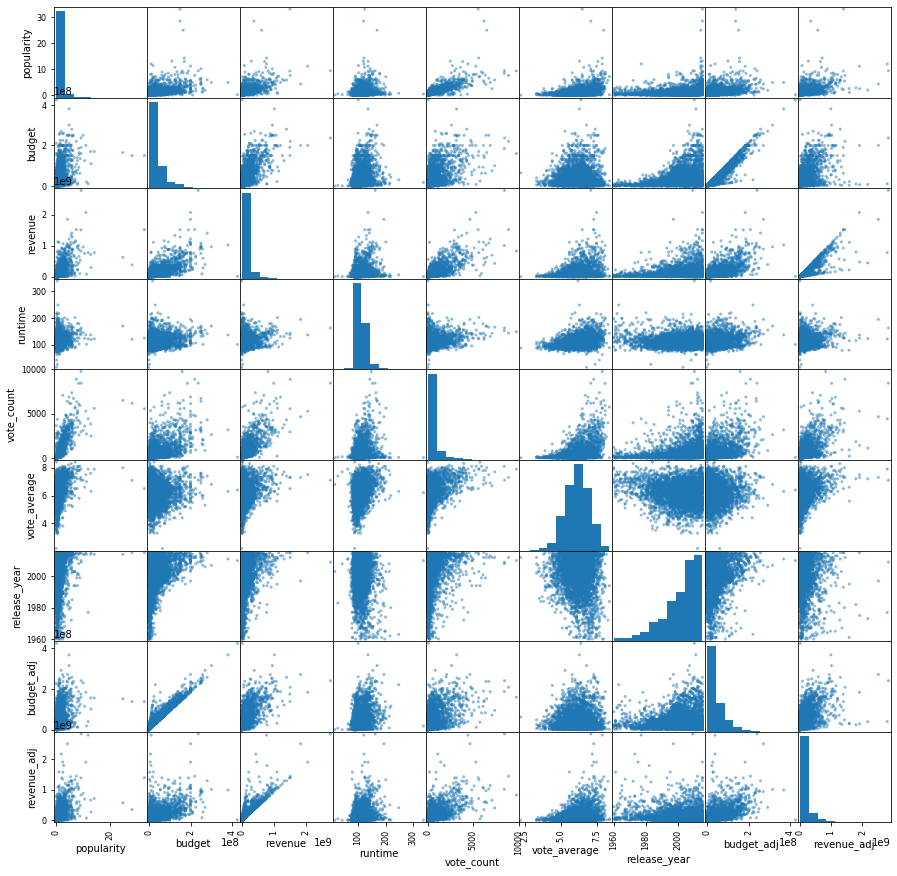

In [9]:
pd.plotting.scatter_matrix(df_num,figsize=(15,15));

<a id='eda'></a>
## Exploratory Data Analysis


### Does movies generating greater revenue are more popular?
The understand the revenue and popularity, I shall select those rows which have number of votes greater than 25 percentile and
Instead of selecting only reveneue I shall selelct (Revenue-Budget)/Budget

In [10]:
# seaborn histogram
def histplot(df, x_dim):
    x = df[x_dim]
    sns.distplot(x, hist=True, kde=False, 
             bins=int(180/6), color = 'blue',
             hist_kws={'edgecolor':'black'})
    #adds a title and axes labels
    plt.title('HISTOGRAM of '+x_dim.upper())
    plt.xlabel(x_dim.upper())
    plt.ylabel('Movies Count')

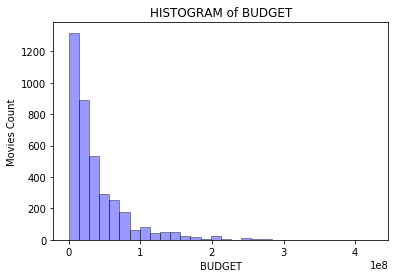

In [11]:
histplot(df_num,'budget')

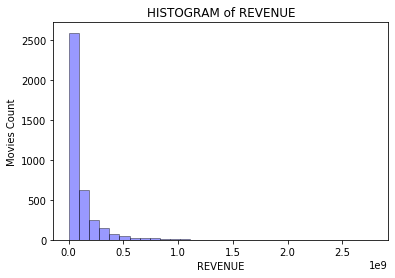

In [12]:
histplot(df_num,'revenue')

In [13]:
df_num['revenue'].median()

44793222.0

Histogram plot of budget and revenue depicts that most movies have lower budget and revenue only few movies have l

We shall define a scatterplot function that would take input of data set name, and column names for x and y axis respectively

In [14]:
#deffing of scatterplot function
def scatterplot(df, x_dim, y_dim):
    x = df[x_dim]
    y = df[y_dim]
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(x, y, alpha=0.70)
    #adds a title and axes labels
    ax.set_title(x_dim.upper() +' vs '+y_dim.upper())
    ax.set_xlabel(x_dim.upper())
    ax.set_ylabel(y_dim.upper())
    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #adds major gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.show()

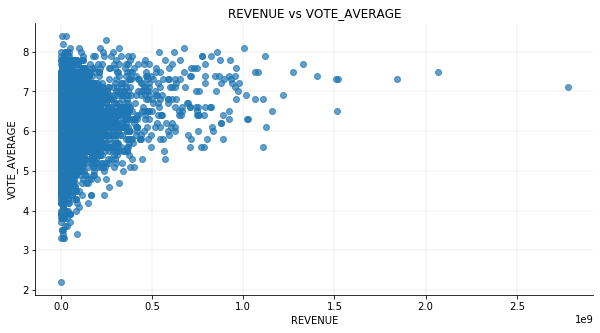

In [15]:
scatterplot(df_num,'revenue','vote_average')

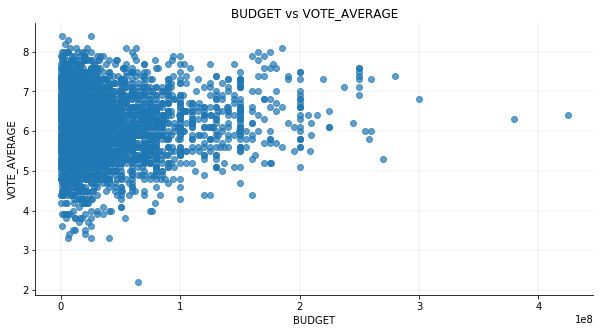

In [16]:
scatterplot(df_num,'budget','vote_average')

From the above scatter plots of revenue and budgest, We can infer that movies with greater budget and revenue gets more vote average. The reason could be that greater budget in movies relates with more advertisement and promotion of the movie thus leading to more views and more vote counts and more vote average

In [17]:
print('The dataset movies has an average budget of ${} with average vote of {}'.format(round(df_num['budget'].mean()),round(df_num['vote_average'].mean(),2)))

The dataset movies has an average budget of $37201828 with average vote of 6.17


### Does the run time of movie has any relationship with popularity?

In order to check the relationship the scatter plot would be drawn. We shall use the scatter plot function that was created earlier

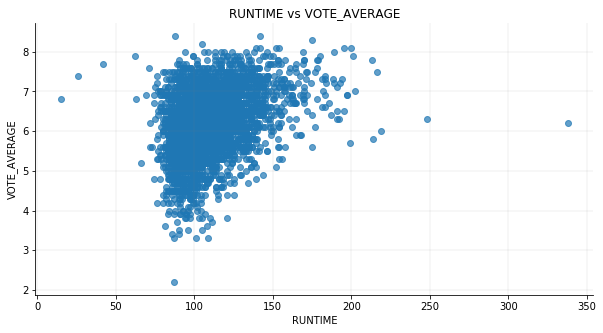

In [18]:
scatterplot(df_num,'runtime','vote_average')

From the above graph it is depicted that although there are exceptions but those movies gets lower vote average(less than 5) which are shorter than 150 minutes. Movies having runtime greater than 150 minutes always gets average more than 5.

In [19]:
print('The dataset movies has an average runtime of {} minutes with average vote of {}'.format(round(df_num['runtime'].mean(),2),round(df_num['vote_average'].mean(),2)))

The dataset movies has an average runtime of 109.22 minutes with average vote of 6.17


<a id='conclusions'></a>
## Conclusions
In this project we have comapred the average vote with budget and revenue and then compared the vote average with runtime. For the scatter plot we first introduced the scatterplot fuction and plotted with respective columns.
#### Vote Average Analysis Results
- The more the Budget the more the vote average the greater the revenue
- The dataset movies has an average budget of $37201828 with average vote of 6.17
- Movies run time greater than 10 always gets vote average greater than 5 and there is direct relationship between both

#### Limitations
We have discussed only the linear relationship. It is quite possible that there might be extrenious factors affecting the average vote and we have dropped multiple rows with missing values. Movies having runtime greater than 150 minutes always gets average more than 5. But there might be other reason behind it such a those movies are produced by big production team and shorter length movies produced by a small production company.